In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [3]:
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

,Targets
0,0
1,0
2,0
3,0
4,0


In [5]:
print(X)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6             4.6          3.4           1.4          0.3
7             5.0          3.4           1.5          0.2
8             4.4          2.9           1.4          0.2
9             4.9          3.1           1.5          0.1
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
16            

In [6]:
print(y)

     Targets
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
..       ...
120        2
121        2
122        2
123        2
124        2
125        2
126        2
127        2
128        2
129        2
130        2
131        2
132        2
133        2
134        2
135        2
136        2
137        2
138        2
139        2
140        2
141        2
142        2
143        2
144        2
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [3]:
# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0,0.5,'Petal Width')

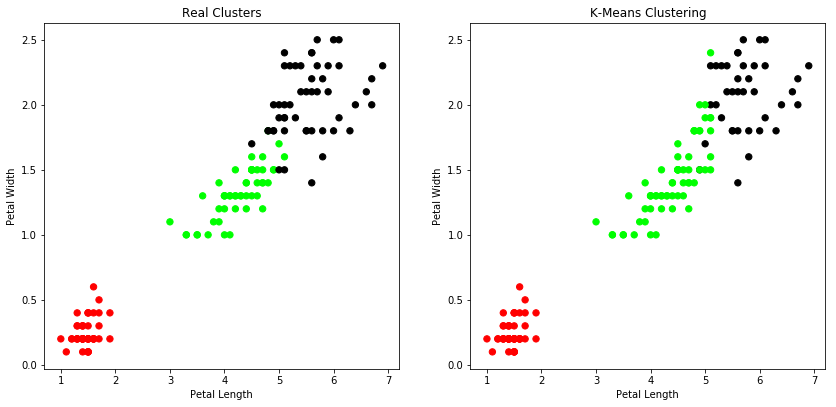

In [8]:
# # Visualise the clustering results
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])
# Plot the Original Classifications using Petal features
plt.subplot(2, 2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# Plot the Models Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [5]:
# General EM for GMM
from sklearn import preprocessing
# transform your data such that its distribution will have a
# mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


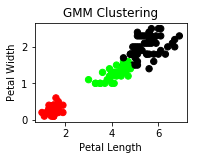

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')